In [1]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt

## 1a

In [2]:
# Dynamics
def state_model(x, a):
    '''
        f(x) = a*x
    '''
    return x*a

def observ_model(x):
    '''
        g(x) = sqrt(x^2+1)
    '''
    return np.sqrt(x**2 + 1)
    
def x_propagating(x,a, e):
    '''
        x_(k+1) = f(x_k) + e_k
    '''
    return state_model(x,a) + e

def y_update(x, v):
    '''
        y_k = g(x_k) + v_k
    '''
    return observ_model(x) + v

In [3]:
seed = 20
np.random.seed(seed)
a0 = -1 
N=100
var_e = 1
var_v = 1/2
e = np.random.normal(0, np.sqrt(var_e), N)
v = np.random.normal(0, np.sqrt(var_v), N)
x = np.array([np.random.normal(1, np.sqrt(2), 1)])

for i in range(N):
    x = np.append(x, x_propagating(x[i], a0, e[i]))

# Observations
D = np.hstack([y_update(x[i+1], v[i]) for i in range(N)])

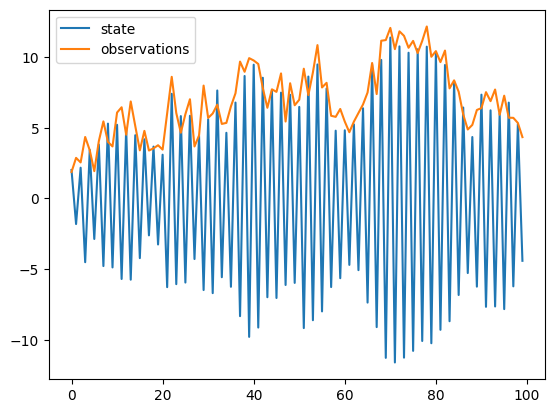

In [4]:
ts = np.arange(N)
plt.plot(ts, x[1:], label = "state")
plt.plot(ts, D, label = "observations")
plt.legend()

## 1 b)
In b, the state will be expanded to [x, a]. We want to estimate mu_a and var_a

In [5]:
# Initialization
np.random.seed(seed)
mu_0 = np.array([[1], [-3.5]])
cov_0 = np.array([2, 1])
a = np.random.normal(mu_0[1,0], np.sqrt(cov_0[1]) , 1)
x = np.random.normal(mu_0[0,0], np.sqrt(cov_0[0]) , 1)

R = np.diag([1, 0.001])
Q = 1/2

mu = mu_0 
cov = np.diag(cov_0)
mu_updated = np.zeros((2,1))
cov_updated = np.zeros((2,2,1))

In [6]:
for i in range(N-1):
    if (i == 0):
        mu_k = mu_0 
        cov_k = cov
    else:
        mu_k = mu_k1_k1 
        cov_k = cov_k1_k1 

    # Step 1: Propagating
    mu_k1_k = np.array([[mu_k[1,0] * mu_k[0,0]], [mu_k[1,0]]])

    A = np.array([[mu_k[1,0], mu_k[0,0]], [0, 1]])  #jacobian matrix of f(x)
    cov_k1_k = A @ cov_k @ A.T + R
    
    # Step 2: Update
    C = np.array([[mu_k1_k[0,0]/np.sqrt(mu_k1_k[0,0]**2 + 1), 0]])
    K = cov_k1_k @ C.transpose() @ np.linalg.inv(C @ cov_k1_k @ C.transpose() + np.array([Q]))

    mu_k1_k1 = mu_k1_k + K * (D[i] - np.sqrt(mu_k1_k[0,0]**2 + 1))
    cov_k1_k1 = (np.identity(2) - K @ C) @ cov_k1_k

    mu_updated = np.hstack([mu_updated, mu_k1_k1])
    cov_updated = np.concatenate((cov_updated, np.expand_dims( cov_k1_k1, axis = 2) ), axis =2)

mu_updated = np.delete(mu_updated,0, axis =1)
cov_updated = np.delete(cov_updated, 0, axis = 2) 

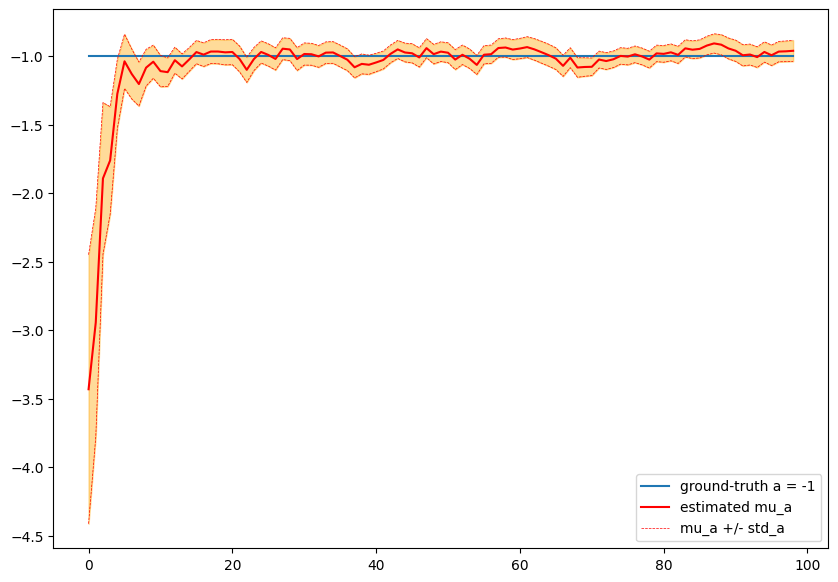

In [11]:
ts = np.arange(N-1)
plt.figure(figsize=(10,7))
plt.plot(ts, a0*np.ones(N-1), label = 'ground-truth a = -1')
plt.plot(ts, mu_updated[1,:], 'r', label = 'estimated mu_a')
plt.plot(ts, mu_updated[1,:] - np.sqrt(abs(cov_updated[1,1,:])), '--r', linewidth = 0.5, label = 'mu_a +/- std_a')
plt.plot(ts, mu_updated[1,:] + np.sqrt(abs(cov_updated[1,1,:])), '--r', linewidth = 0.5)
plt.fill_between(ts, mu_updated[1,:] + np.sqrt(abs(cov_updated[1,1,:])), mu_updated[1,:] - np.sqrt(abs(cov_updated[1,1,:])), alpha=.4, color="orange")
plt.legend()